In [1]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df =  pd.read_csv('data/Pokemon.csv') 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9070735090152566


In [4]:
logistic_model.coef_

array([[ 0.00829422,  0.01804823,  0.03239594,  0.02280706,  0.02671366,
         0.00715197, -0.2514564 ]])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = df.reset_index()
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


In [8]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
print("Recall:",metrics.recall_score(Y_test, pred_test))

Accuracy: 0.9262672811059908
Precision: 0.4074074074074074
Recall: 1.0


In [23]:
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_legendary = X[X.isLegendary==False]
legendary = X[X.isLegendary==True]

# upsample minority
legendary_upsampled = resample(legendary,
                          replace=True, # sample with replacement
                          n_samples=len(not_legendary), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
legendary_upsampled = pd.concat([not_legendary, legendary_upsampled])

# check new class counts
legendary_upsampled.isLegendary.value_counts()

True     469
False    469
Name: isLegendary, dtype: int64

In [24]:
Y_train = legendary_upsampled.isLegendary
X_train = legendary_upsampled.drop('isLegendary', axis=1)

legendary_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = legendary_upsampled.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(Y_test, upsampled_pred))
print("Precision:",metrics.precision_score(Y_test, upsampled_pred))
print("Recall:",metrics.recall_score(Y_test, upsampled_pred))

Accuracy: 0.9447004608294931
Precision: 0.4782608695652174
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

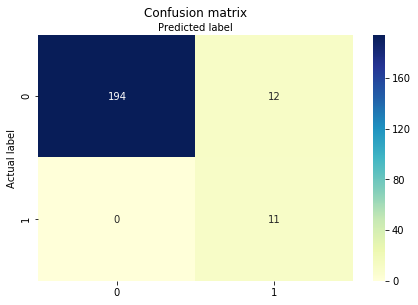

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')